In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"AB_NYC_2019.csv")

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43427 entries, 0 to 43426
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43427 non-null  int64  
 1   name                            43411 non-null  object 
 2   host_id                         43426 non-null  float64
 3   host_name                       43405 non-null  object 
 4   neighbourhood_group             43426 non-null  object 
 5   neighbourhood                   43426 non-null  object 
 6   latitude                        43426 non-null  float64
 7   longitude                       43426 non-null  float64
 8   room_type                       43426 non-null  object 
 9   price                           43426 non-null  float64
 10  minimum_nights                  43426 non-null  float64
 11  number_of_reviews               43426 non-null  float64
 12  last_review                     

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df.shape

(43427, 16)

In [9]:
df.isnull().sum()

,0
id,0
name,16
host_id,1
host_name,22
neighbourhood_group,1
neighbourhood,1
latitude,1
longitude,1
room_type,1
price,1


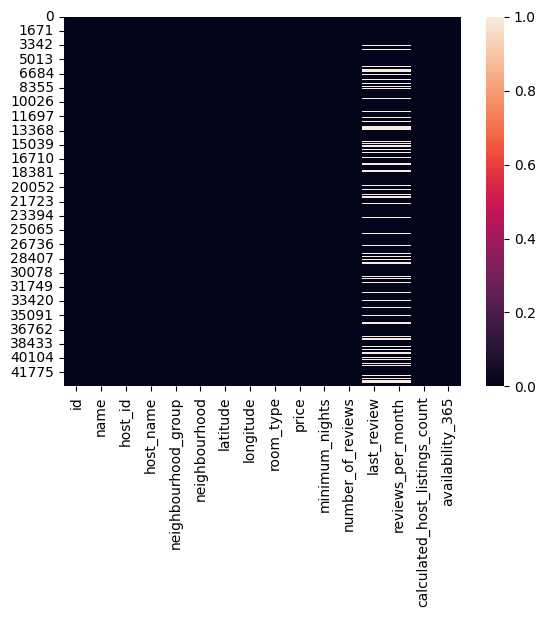

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,43427.0,1.699204e+07,9.953051e+06,2539.00000,8.369551e+06,1.745693e+07,2.553793e+07,3.365078e+07
host_id,43426.0,5.707059e+07,6.782592e+07,2438.00000,6.948271e+06,2.591267e+07,8.414183e+07,2.575691e+08
latitude,43426.0,4.072872e+01,5.439930e-02,40.49979,4.068960e+01,4.072247e+01,4.076322e+01,4.091169e+01
longitude,43426.0,-7.395251e+01,4.520691e-02,-74.24285,-7.398268e+01,-7.395565e+01,-7.393717e+01,-7.371299e+01
price,43426.0,1.495718e+02,2.377804e+02,0.00000,6.900000e+01,1.050000e+02,1.750000e+02,1.000000e+04
minimum_nights,43426.0,7.026136e+00,2.096854e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,43426.0,2.595795e+01,4.657263e+01,0.00000,1.000000e+00,7.000000e+00,2.800000e+01,6.290000e+02
reviews_per_month,36053.0,1.281800e+00,1.624674e+00,0.01000,1.700000e-01,6.100000e-01,1.900000e+00,5.850000e+01
calculated_host_listings_count,43426.0,6.312762e+00,2.846899e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,43426.0,1.065662e+02,1.303374e+02,0.00000,0.000000e+00,3.200000e+01,2.130000e+02,3.650000e+02


In [15]:
# Fill missing 'name' and 'host_name' with 'Unknown'
df['name'].fillna("Unknown", inplace=True)
df['host_name'].fillna("Unknown", inplace=True)

In [14]:
# For 'reviews_per_month', fill missing values with 0, since it likely means no reviews
df['reviews_per_month'].fillna(0, inplace=True)

In [16]:
# Convert 'last_review' to datetime format, forcing errors to NaT
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [17]:
# Check for any conversion issues
print("\nUnique values in 'last_review' after conversion:", df['last_review'].unique())


Unique values in 'last_review' after conversion: <DatetimeArray>
['2018-10-19 00:00:00', '2019-05-21 00:00:00',                 'NaT',
 '2019-07-05 00:00:00', '2018-11-19 00:00:00', '2019-06-22 00:00:00',
 '2017-10-05 00:00:00', '2019-06-24 00:00:00', '2017-07-21 00:00:00',
 '2019-06-09 00:00:00',
 ...
 '2018-01-28 00:00:00', '2017-10-26 00:00:00', '2018-01-22 00:00:00',
 '2017-11-16 00:00:00', '2018-02-13 00:00:00', '2018-02-05 00:00:00',
 '2018-02-09 00:00:00', '2017-12-23 00:00:00', '2018-01-29 00:00:00',
 '2018-03-29 00:00:00']
Length: 1765, dtype: datetime64[ns]


In [18]:
# Fill missing 'last_review' with the minimum date in the cleaned column
min_date = df['last_review'].min()
df['last_review'].fillna(min_date, inplace=True)

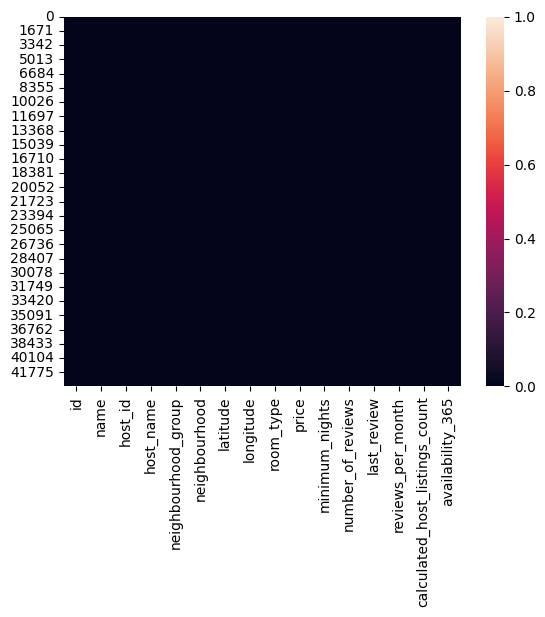

In [19]:
# visulzations of missing values
sns.heatmap(df.isnull())
plt.show()

In [20]:
df.drop_duplicates(inplace=True)

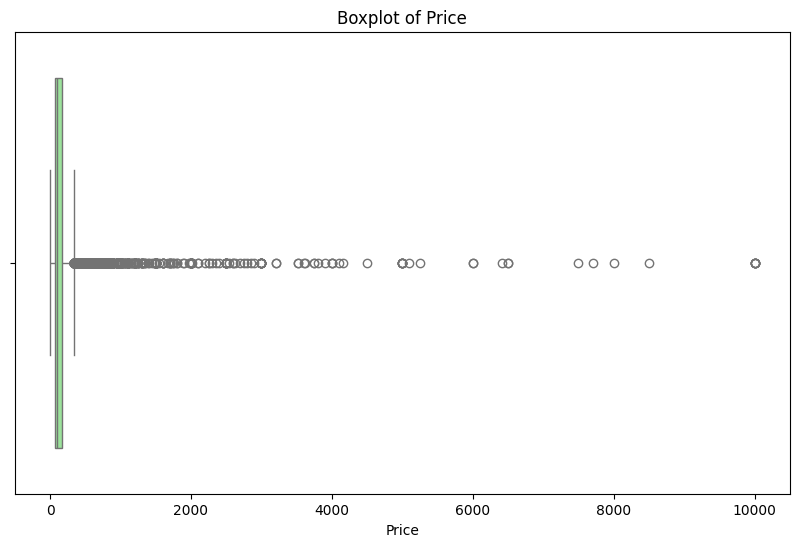

In [21]:
# Checking for Outliers for `Price`
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'],color='LightGreen')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()


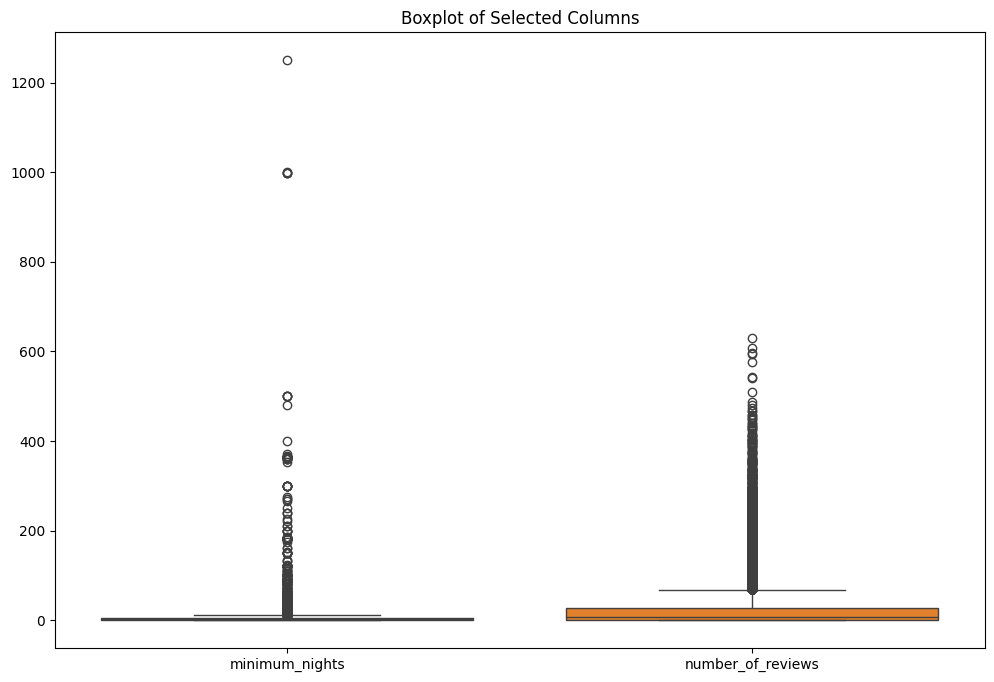

In [22]:
# Boxplot for Minimum_nights and number_of_reviews columns to identify outliers -

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['minimum_nights', 'number_of_reviews']])
plt.title('Boxplot of Selected Columns')
plt.show()


In [23]:
# Removing outliers in 'price' using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

In [24]:
df['price']

,price
0,149.0
1,225.0
2,150.0
3,89.0
4,80.0
...,...
43421,55.0
43422,108.0
43423,160.0
43424,60.0


In [25]:
# Removing outliers in 'minimum_nights' using IQR method
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['minimum_nights'] >= (Q1 - 1.5 * IQR)) & (df['minimum_nights'] <= (Q3 + 1.5 * IQR))]

In [26]:
df['minimum_nights']

,minimum_nights
0,1.0
1,1.0
2,3.0
3,1.0
4,10.0
...,...
43421,1.0
43422,1.0
43423,2.0
43424,1.0


In [27]:
# Removing outliers in 'number_of_reviews' using IQR method
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['number_of_reviews'] >= (Q1 - 1.5 * IQR)) & (df['number_of_reviews'] <= (Q3 + 1.5 * IQR))]

In [28]:
df['number_of_reviews']

,number_of_reviews
0,9.0
1,45.0
2,0.0
4,9.0
5,74.0
...,...
43421,11.0
43422,11.0
43423,3.0
43424,0.0


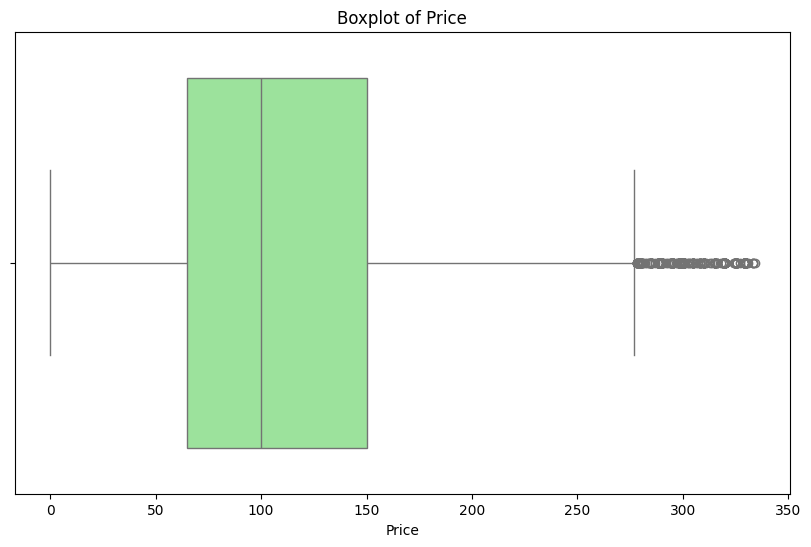

In [29]:
# Checking for Outliers for `Price`
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'],color='LightGreen')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

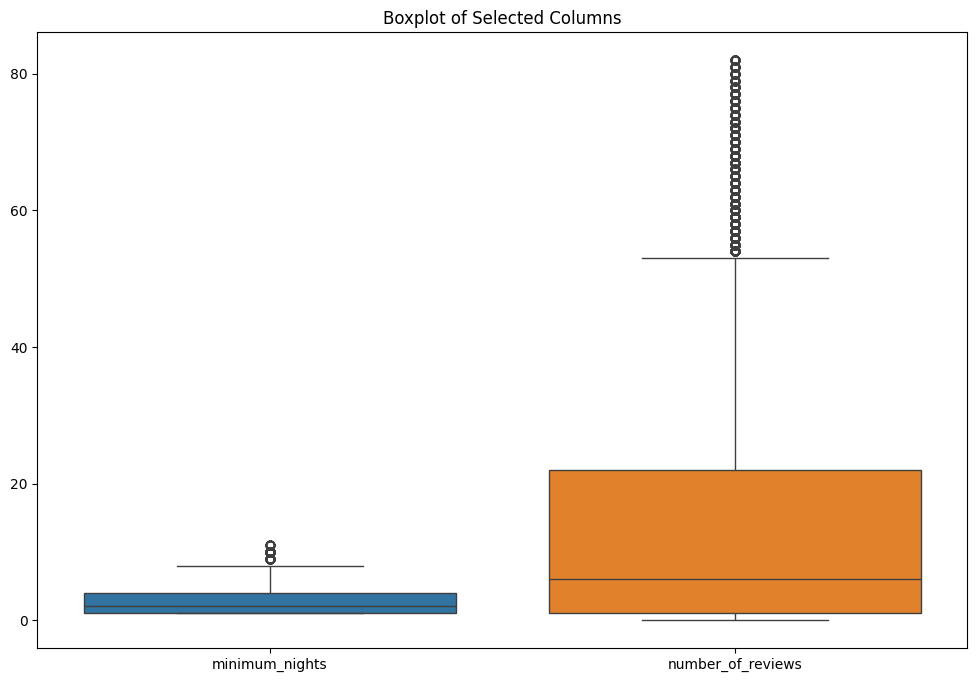

In [30]:
# Boxplot for Minimum_nights and number_of_reviews columns to identify outliers -

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['minimum_nights', 'number_of_reviews']])
plt.title('Boxplot of Selected Columns')
plt.show()


In [31]:
# Renaming columns to lowercase
df.columns = df.columns.str.lower()

In [32]:
print("\nCleaned Data Types:\n", df.dtypes)


Cleaned Data Types:
 id                                         int64
name                                      object
host_id                                  float64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count           float64
availability_365                         float64
dtype: object


In [33]:
print("\nCleaned Summary Statistics:\n", df.describe())


Cleaned Summary Statistics:
                  id       host_id      latitude     longitude         price  \
count  3.186100e+04  3.186100e+04  31861.000000  31861.000000  31861.000000   
mean   1.784445e+07  5.926844e+07     40.727534    -73.950218    118.257023   
min    2.539000e+03  2.571000e+03     40.499790    -74.242850      0.000000   
25%    9.478196e+06  7.574029e+06     40.688380    -73.980870     65.000000   
50%    1.892956e+07  2.769854e+07     40.719880    -73.953810    100.000000   
75%    2.635853e+07  8.906812e+07     40.763290    -73.934320    150.000000   
max    3.364572e+07  2.575691e+08     40.907340    -73.712990    334.000000   
std    9.722635e+06  6.918125e+07      0.056043      0.046262     66.699265   

       minimum_nights  number_of_reviews                    last_review  \
count    31861.000000       31861.000000                          31861   
mean         2.795361          15.214494  2017-06-18 04:53:30.294717440   
min          1.000000           0

In [34]:
print("\nRemaining Missing Values:\n", df.isnull().sum())


Remaining Missing Values:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [35]:
print("\nData Shape after Cleaning:", df.shape)


Data Shape after Cleaning: (31861, 16)


In [36]:
# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=True)